In [1046]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [1047]:
import numpy as np
import pandas as pd

In [1048]:
import datetime as dt

---
# Reflect Tables into SQLAlchemy ORM

In [1049]:
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func, inspect

In [1050]:
engine=create_engine('sqlite:///Resources/hawaii.sqlite')

In [1051]:
Base=automap_base()
Base.prepare(engine, reflect=True)

In [1052]:
Base.classes.keys()

['measurement', 'station']

In [1053]:
Station=Base.classes.station
Measurement=Base.classes.measurement

In [1054]:
session=Session(engine)

In [1055]:
inspector=inspect(engine)

### Inspect Tables

---
##### Station Table

In [1056]:
stations=engine.execute('SELECT * FROM Station')

In [1057]:
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [1058]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [1059]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


---
##### Measurement Table

In [1060]:
measurements=engine.execute('SELECT * FROM Measurement LIMIT 15')

In [1061]:
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [1062]:
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [1064]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


---
# Exploratory Climate Analysis

---
###  - Precipitation Analysis

Plot of the last 12 months of the precipitation data and its summary statistics.

---
##### The Latest Date in The Dataset

In [1065]:
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
latest_date

('2017-08-23')

##### The Date 1 Year Before  The Latest Date in The Dataset

In [1091]:
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)

Query Date:  2016-08-22


##### Max Precipitation Scores For The Last Year in The Dataset

In [1077]:
year_prcp=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
year_prcp

##### Precipitation Query Results as  Pandas DataFrame

In [1078]:
prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)

prcp
date            
2016-08-23  1.79
2016-08-24  2.28
2016-08-25  0.21
2016-08-26  0.04
2016-08-27  0.18
2016-08-28  2.07
2016-08-29  0.90
2016-08-30  0.05
2016-08-31  2.46
2016-09-01  0.02

##### Precipitation DataFrame Sorted by Date

In [1079]:
prcp_df.sort_values('date')

prcp
date            
2016-08-23  1.79
2016-08-24  2.28
2016-08-25  0.21
2016-08-26  0.04
2016-08-27  0.18
...          ...
2017-08-19  0.09
2017-08-20  0.01
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[366 rows x 1 columns]

##### Daily Maximum Precipitation for One Year in Honolulu, Hawaii

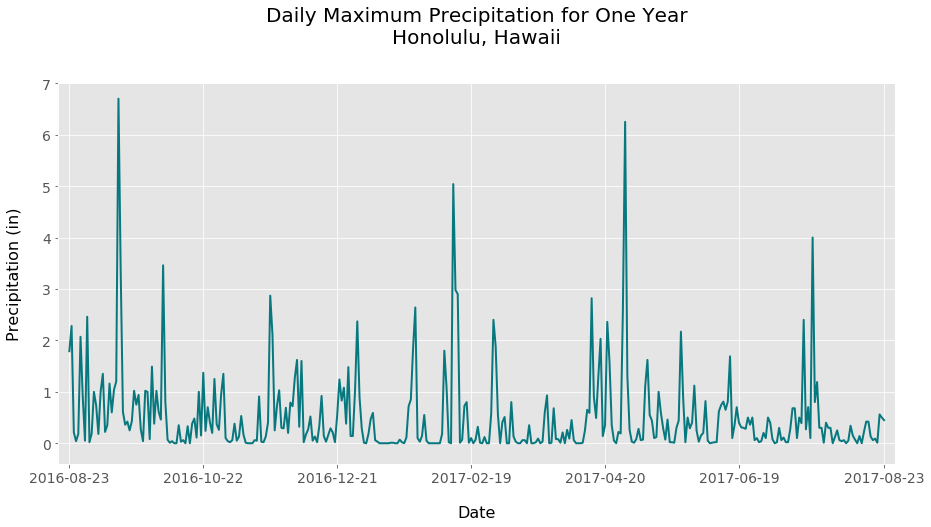

In [1080]:
plt.rcParams['figure.figsize']=(15,7)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep aqua')

plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()

##### All Precipitation Scores For The Last Year in The Dataset

In [1082]:
year_prcp_stats=(session.query(Measurement.date, Measurement.prcp)
                        .filter(Measurement.date > year_ago_date)
                        .all())
year_prcp_stats

In [1083]:
year_prcp_stats_df=pd.DataFrame(year_prcp_stats, columns=['date', 'prcp'])
year_prcp_stats_df
year_prcp_stats_df.dropna()

date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2223  2017-08-17  0.13
2225  2017-08-19  0.09
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2021 rows x 2 columns]

##### Summary Statistics For The Precipitation Data

In [295]:
year_prcp_stats_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

---
### - Station Analysis

Temperature observation data (TOBS) for the last 12 months and histogram plot for the station with the highest number of observations.

---
##### Number of Stations in The Dataset

In [1084]:
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


##### Station Activity

In [1085]:
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

##### Min, Avg, and Max Temperature Records of The Most Active Station

In [1086]:
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

min_temp  max_temp   avg_temp
station                                   
USC00519281      54.0      85.0  71.663781

##### Temperature Observations Between Aug 2016 and  Aug 2017 at USC00519281 Station

In [1088]:
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs

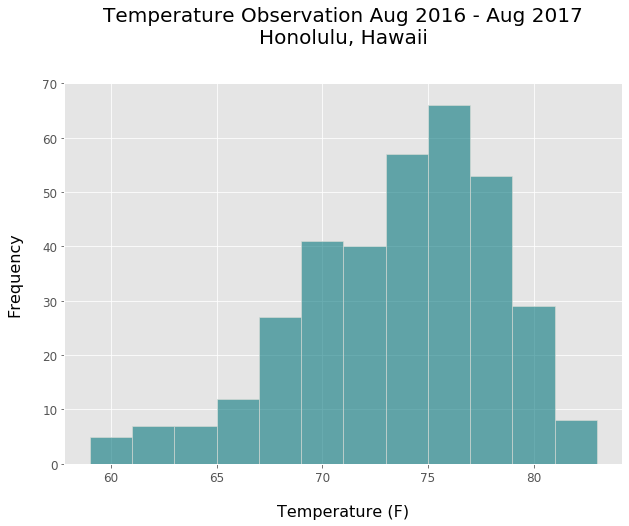

In [1089]:
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='xkcd:deep aqua')

plt.title('Temperature Observation Aug 2016 - Aug 2017\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

---